# E-TİCARET VERİLERİ İLE İŞ ZEKASI ANALİZİ

### 🎯 Proje Hedefleri ve İçgörüler

* Bu analiz, stok yönetimi, pazarlama stratejileri ve coğrafi büyüme alanlarına odaklanmıştır.

## 🧼 Veri Seti İncelemesi ve Temizliği


In [1]:
import numpy as np 
import pandas as pd 


In [2]:
file_name = "online_retail.csv"
df = pd.read_csv(file_name)

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Veri Yapısı ve Eksik Değerler

### Aykırı ve Hatalı Kayıtların Ele Alınması

Description ve CustomerID sütununda eksik veriler mevcuttur. 

In [6]:
#eksik değerleri ele alma: 
print("Başlangıç satır sayısı: ", df.shape[0])
df.dropna(subset=['CustomerID'], inplace=True)
print("CustomerID eksik satırlar atıldıktan sonra satır sayısı: ", df.shape[0])

Başlangıç satır sayısı:  541909
CustomerID eksik satırlar atıldıktan sonra satır sayısı:  406829


> **Kritik Karar:** Müşteri segmentasyonu yapmak için, CustomerID'si olmayan **135.080** kayıt analizden çıkarılmıştır.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [8]:
#veri tipi dönüşümü:
#InvoiceDate object olarak karşımıza çıkıyor bunu datatime tipine dönüştüreceğiz. 
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

#customerıd yi int a dönüştürme 
df['CustomerID'] = df['CustomerID'].astype(int)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int64         
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.9+ MB


In [10]:
#aykırı/anormal değerleri temizleme (Quantity ve UnitPrice)
#iadeler ve geçersiz kayıtlar olduğu zaman '-' değere düşebilir bunda olumsuz etkiler
df = df[(df['Quantity']>0) & (df['UnitPrice'] > 0)]
print("negatif/sıfır miktar veya fiyat satırları atıldıktan sonraki satır sayısı: ", df.shape[0])

negatif/sıfır miktar veya fiyat satırları atıldıktan sonraki satır sayısı:  397884


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int64         
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.3+ MB


In [12]:
#Yeni Değişken Üretimi: sales sütunu oluşturacağız. 
#daha verimli incelemeler yapmak için mantıklı. 
df['Sales'] = df['Quantity'] * df['UnitPrice']

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int64         
 7   Country      397884 non-null  object        
 8   Sales        397884 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 30.4+ MB


In [14]:
#sonuçlar 
print("\nSon DataFrame'in İlk 5 Satırı (Sales sütunu dahil):")
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))


Son DataFrame'in İlk 5 Satırı (Sales sütunu dahil):
| InvoiceNo   | StockCode   | Description                         | Quantity   | InvoiceDate         | UnitPrice   | CustomerID   | Country        | Sales   |
|:------------|:------------|:------------------------------------|:-----------|:--------------------|:------------|:-------------|:---------------|:--------|
| 536365      | 85123A      | WHITE HANGING HEART T-LIGHT HOLDER  | 6          | 2010-12-01 08:26:00 | 2.55        | 17850        | United Kingdom | 15.3    |
| 536365      | 71053       | WHITE METAL LANTERN                 | 6          | 2010-12-01 08:26:00 | 3.39        | 17850        | United Kingdom | 20.34   |
| 536365      | 84406B      | CREAM CUPID HEARTS COAT HANGER      | 8          | 2010-12-01 08:26:00 | 2.75        | 17850        | United Kingdom | 22      |
| 536365      | 84029G      | KNITTED UNION FLAG HOT WATER BOTTLE | 6          | 2010-12-01 08:26:00 | 3.39        | 17850        | United Kingdom | 20.

Genel Değerlendirme: Artık verimiz temizlenmiş ve müşteri ıd si olmayan kayıtları içermiyor. Tarih sutunu gerekli datatime formatına dönüştürüldü. Negatif iade ve sıfır formatlı kayıtlar içermiyor. Yeni sales toplam satış sütunu eklendi. 

## 📈 Temel İş Metrikleri ve Görselleştirmeler


### 3.1. Satışların Zamansal Dağılımı (Mevsimsellik Analizi)

*Amaç:* Yıl içinde satışların en yoğun olduğu dönemleri belirleyerek pazarlama stratejilerine yön vermek.

In [15]:
#Kütüphane Yükleme 
import seaborn as sns 
import matplotlib.pyplot as plt 


In [16]:
#aylık toplam satışları hesaplama 
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
month_sales = df.groupby('InvoiceMonth')['Sales'].sum().reset_index()


In [17]:
#ay Sütununu tekrar datatime'a çevirerek görselleştirme kolaylaştırma 
month_sales['InvoiceMonth'] = month_sales['InvoiceMonth'].dt.to_timestamp()


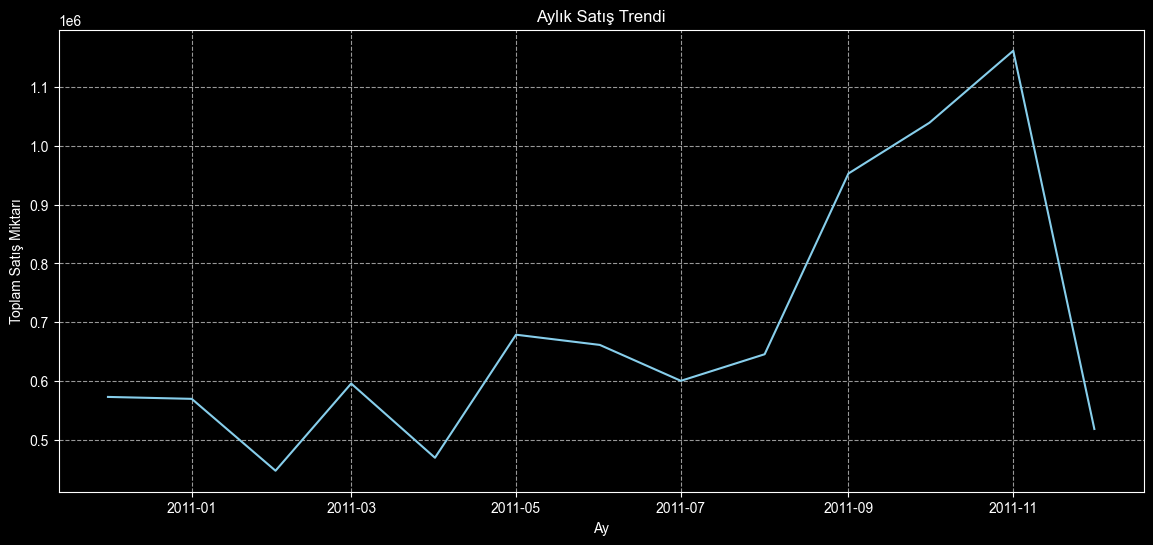

In [18]:
#görselleştirme aşaması 
plt.figure(figsize=(14,6))
sns.lineplot(x='InvoiceMonth', y='Sales', data=month_sales, color='skyblue')
sns.set_style("white")
plt.title('Aylık Satış Trendi')
plt.xlabel('Ay')
plt.ylabel('Toplam Satış Miktarı')
plt.grid(True, linestyle = '--', alpha=0.6)
plt.show()

İçgörü: Aylık satış hacmi, Ağustos ayından itibaren kademeli bir artış göstererek Kasım ayında yılın zirvesine ulaşmaktadır. Bu desen, e-ticaret sektörü için tipik olan Sonbahar/Tatil sezonu ve Kasım indirimleri (Black Friday) yoğunluğunu güçlü bir şekilde teyit etmektedir.

Yılbaşı sonrası dönemde ise (Aralık sonu ve Ocak başı), satışlarda keskin bir düşüş gözlemlenmektedir. Bu durum, indirimlerin sona ermesi ve tatil sonrası doğal bir sakinleşmeyi işaret etmektedir.

📌 İş Notu ve Öneri:

Şirketin gelecekteki büyüme planları için, mevsimsel talebi tam olarak karşılayabilmek adına Temmuz ayından itibaren pazarlama stratejilerini hazırlaması ve gerekli stok güncellemelerini tamamlayarak tedarik zincirini güçlendirmesi kritik önem taşımaktadır.

### En Çok Satış Yapan Ülkeler 

In [19]:
#Ülke bazında toplam satışları hesaplama 
country_sales = df.groupby('Country')['Sales'].sum().sort_values(ascending=False)

#UK(Birleşik Krallık) genellikle çok büyük olduğu için, diğer ülkeleri daha net göremek için onu hariç tutuyoruz. 
top_countries = country_sales.drop('United Kingdom', errors='ignore').head(10).reset_index()

C:\Users\ersev\AppData\Local\Temp\ipykernel_27276\4118688504.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Sales', data=top_countries, palette='viridis')


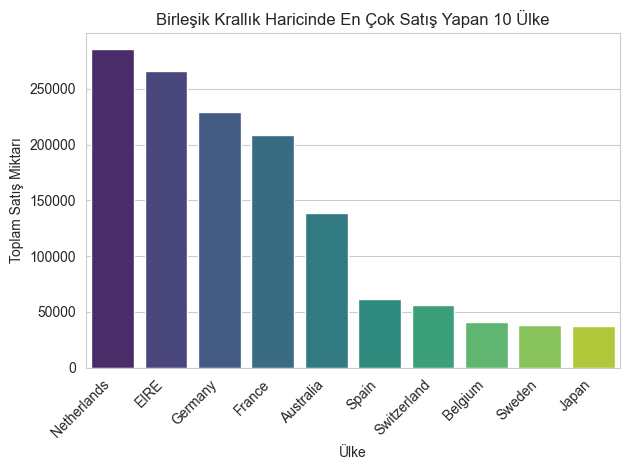

In [20]:
#görselleştirme aşaması 
plt.Figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.barplot(x='Country', y='Sales', data=top_countries, palette='viridis')
plt.title('Birleşik Krallık Haricinde En Çok Satış Yapan 10 Ülke')
plt.xlabel('Ülke')
plt.ylabel('Toplam Satış Miktarı')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

İçgörü: Birleşik Krallık dışındaki uluslararası satışlar incelendiğinde, Hollanda, İrlanda ve Almanya sırasıyla en büyük üç pazarı oluşturmaktadır. Bu üç pazarın yanı sıra Fransa'nın satış hacminin de bu gruba yakın olması, bu dört ülkenin uluslararası gelirin ana kaynağı olduğunu göstermektedir. Bu pazarlar istikrarlı ve yönetilebilir büyüklüktedir.

Kırılma Noktası: Fransa'dan sonra gelen Avustralya ve İspanya'daki satış hacminde gözlemlenen ciddi düşüşler, pazar stratejisinin bu ülkelerde farklılaşması veya operasyonel/lojistik engellerin bulunması gerektiğine işaret etmektedir. İspanya'dan sonraki daha küçük pazarlar ise, yakın hacimleri sayesinde gelecekteki potansiyel büyüme fırsatlarını barındırmaktadır.

📌 İş Notu ve Öneri:

Şirketin, satış hacminde önde gelen Hollanda, İrlanda ve Almanya'ya odaklanarak müşteri memnuniyetini en üst düzeyde tutması önerilir. Düşüş yaşanan Avustralya ve İspanya gibi ülkeler için ise pazar stratejileri, ürün konumlandırması veya fiyatlandırma politikaları yeniden değerlendirilmelidir.

### En Çok Satan Ürünler ve Müşteri Analizi 

C:\Users\ersev\AppData\Local\Temp\ipykernel_27276\1465153745.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales', y= 'Description', data=product_sales, palette='magma')


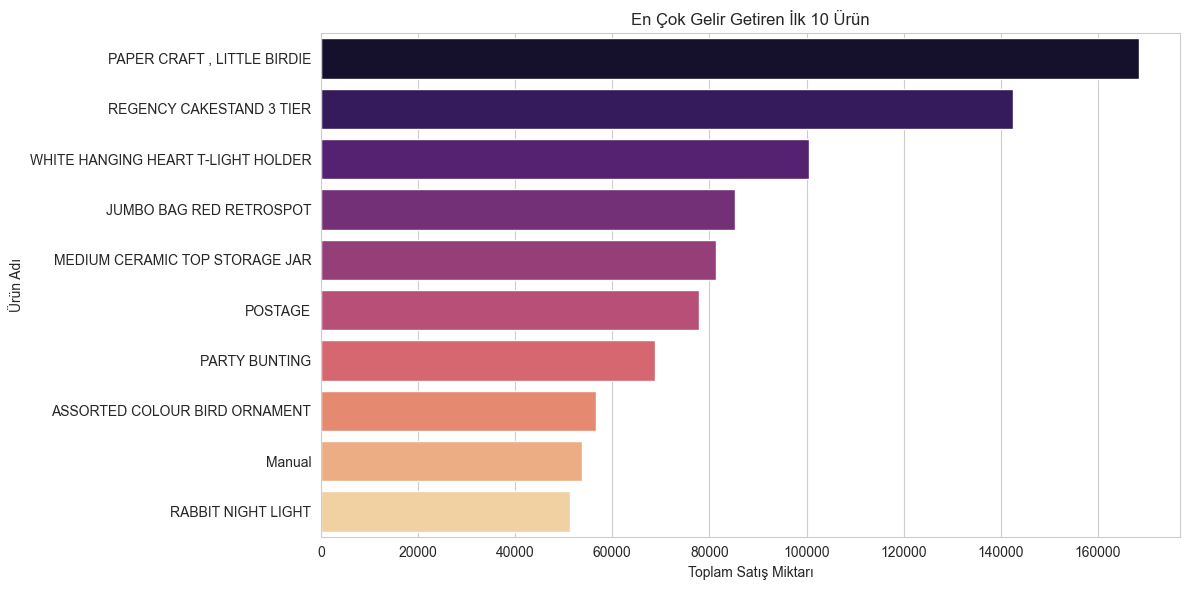

In [21]:
#ürün bazında toplam satışları hesaplama 
product_sales = df.groupby('Description')['Sales'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.barplot(x='Sales', y= 'Description', data=product_sales, palette='magma')
plt.title('En Çok Gelir Getiren İlk 10 Ürün')
plt.xlabel('Toplam Satış Miktarı')
plt.ylabel('Ürün Adı')
plt.tight_layout()
plt.show()

İçgörü: Satış gelirine göre yapılan analizde, "Paper Craft, Little Birdie" ürünü açık ara farkla en yüksek ciroyu getiren ürün olarak öne çıkmaktadır. Bunu takiben, "Regency Cake Stand 3 Tier" ve "White Hanging Heart T-Light Holder" gibi ürünler de gelir açısından kritik öneme sahiptir.

Ürün isimleri incelendiğinde, en çok gelir getiren bu ürünlerin genellikle hediyelik eşya, ev dekorasyonu ve el sanatları gibi niş kategorilere ait olduğu görülmektedir. Bu durum, şirketin ana gelir kaynağının bu özel kategoriye olan yüksek talebe dayandığını göstermektedir.

📌 İş Notu ve Öneri:

Şirketin karlılığını sürdürmek için, "Little Birdie" gibi yüksek performanslı ve niş kategorideki lider ürünlerin tedarik zinciri ve stok yönetimine en yüksek öncelik verilmelidir. Bu, yüksek talep dönemlerinde stok tükenme riskini (stock-out) en aza indirmek için hayati önem taşır.

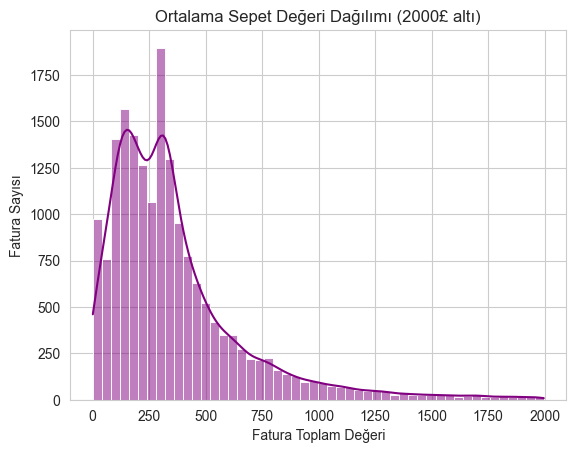

In [22]:
#müşterilerin ortalama sepet değeri dağılımı 

#her bir faturanın(sepetin) toplam değerini hesaplama 
invoice_totals = df.groupby('InvoiceNo')['Sales'].sum().reset_index()

plt.Figure(figsize=(10,5))
sns.set_style("whitegrid")

#sepet değerinin dağılımını görelim. Çok büyük değerler olduğu için x ekseninin sınırlandıralım. 
#örneğin 0 ile 2000 arasındaki dağılıma odaklanalım 
sns.histplot(invoice_totals[invoice_totals['Sales']<2000]['Sales'], bins=50, kde=True, color='purple')
plt.title('Ortalama Sepet Değeri Dağılımı (2000£ altı)')
plt.xlabel('Fatura Toplam Değeri')
plt.ylabel('Fatura Sayısı')
plt.show()

İçgörü: Fatura toplam değerlerinin dağılımı incelendiğinde, dağılımın sola çarpık (pozitif eğimli) olduğu görülmektedir. Bu, düşük değerli işlemlerin sayısının, yüksek değerli işlemlerden belirgin ölçüde fazla olduğu anlamına gelir.

En yüksek frekans (tepe noktası), faturaların büyük bir çoğunluğunun 300£ ile 350£ bandında kesildiğini göstermektedir. Bu aralık, şirketin en yaygın müşteri işlem davranışını temsil etmektedir. Genel olarak, müşterilerin büyük çoğunluğu küçük ve orta boy sepetler hazırlamaktadır. Fiyat arttıkça fatura sayılarının hızla düşmesi bu durumu doğrulamaktadır.

📌 İş Notu ve Öneri:

Şirketin yüksek işlem hacmini koruması ve artırması için, mevcut talebin yoğunlaştığı makul fiyat aralığındaki ürünlerin stokları güvence altına alınmalıdır.

Ayrıca, ortalama sepet değerini yükseltmek amacıyla, 350£ bandındaki müşterilere yönelik Çapraz Satış (Cross-Sell) ve Yukarı Satış (Up-Sell) stratejileri geliştirilerek ek gelir potansiyeli maksimize edilmelidir.

## ✅ SONUÇLAR VE İŞ ÖNERİLERİ
* Stok Yönetimi: Lider ürünlerin listesi çıkarılmıştır.
* Pazarlama Stratejisi:Q4 yoğunluğu için erken hazırlık ve ana pazarlara odaklanma önerilmiştir.



### 🚀 Projenin İlerisi: Makine Öğrenimine Geçiş
Bu analiz, şirketin Veri Bilimi yolculuğu için temel oluşturmuştur. Bir sonraki adımda, elde edilen veriler üzerinden **RFM metrikleri** ile **Müşteri Segmentasyonu** yaparak pazarlama bütçesi optimizasyonu sağlanacaktır.


# Makina Öğrenmesi 

RFM metrikleri nedir? 
RFM metrikleri; müşteri analizinde kullanılan üç temel ölçüttür:
* R (Recency-Yenilik): Müşteri en son ne zaman alışveriş yaptı?
son alışveriş tarihi ne kadar yakınsa müşteri o kadar aktif kabul edilir. 
* F (Frenquency- Sıklık): Müşteri ne kadar sık alışveriş yapıyor?
Daha sık alışveriş yapan müşteriler markaya daha bağlıdır. 
* M (Menetary-Parasal değer): Müşteri ne kadar harcama yapıyor?
Daha yüksek harcama yapan müşteriler işletme için daha değerlidir.

RFM analizi, müşterileri üç kategoriye göre puanlayarak sadık, riskli ve kazanılması gereken müşteri diye segmentlere ayırmak için kullanılır.

In [26]:
import datetime as dt
# df DataFrame'indeki en son fatura tarihini bulma 
last_date = df['InvoiceDate'].max()
snapshot_date = last_date + dt.timedelta(days=1)

#RFM metrikleri hesaplama 
rfm_df = df.groupby('CustomerID').agg(
    Recency =('InvoiceDate', lambda x:(snapshot_date - x.max()).days),
    Frequency = ('InvoiceNo', 'nunique'),
    Monetary = ('Sales','sum')
).reset_index()

#çıktılar 
rfm_df.head()



,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12347,2,7,4310.00
2,12348,75,4,1797.24
3,12349,19,1,1757.55
4,12350,310,1,334.40


In [27]:
rfm_df.describe()

,CustomerID,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000,4338.000000
mean,15300.408022,92.536422,4.272015,2054.266460
std,1721.808492,100.014169,7.697998,8989.230441
min,12346.000000,1.000000,1.000000,3.750000
25%,13813.250000,18.000000,1.000000,307.415000
50%,15299.500000,51.000000,2.000000,674.485000
75%,16778.750000,142.000000,5.000000,1661.740000
max,18287.000000,374.000000,209.000000,280206.020000


Yukarıda görülen üç metrik çok farklı aralıklara ve çarpık dağılımlara sahiptir. Özellikle Monetary(Parasal değer) metriğinde 280 bin gibi devasa bir ma değer varken, ortalama sadece 2 bin civarındadır. Bu da aykırı değerlerin olduğunun işaretidir. 

Makine Öğrenimi algoritmaları (özellikle K-Means), bu tür çarpık veriler ve büyük farklılıklar içeren aralıklar karşısında kötü performans gösterir.
Bu nedenle, K-Means'i çalıştırmadan önce iki kritik ön işleme adımı atmalıyız:
* Çarpıklığı Azaltma (Skewness Reduction): Veri dağılımını normalleştirmek için Logaritmik Dönüşüm uygulamak.
* Ölçeklendirme (Scaling): Tüm değerleri ortak bir ölçeğe (Örn: Z-Score) getirmek.




K-Means modelimizin performansını artırmak için, Frequency ve Monetary değerlerindeki yüksek çarpıklığı düzeltelim.

In [28]:
# RFM metriklerinin logaritmik dönüşümünü uygulama 
rfm_log = rfm_df[['Recency', 'Frequency','Monetary']].apply(np.log, axis=1)

#Sütun adlarını güncelleme 
rfm_log.columns = ['Recency_log', 'Frequency_log', 'Monetary_log']

#yeni istatistikleri inceleme
print("\nLogaritmik Dönüşüm Sonrası İstatistikler:")
print(rfm_log.describe())


Logaritmik Dönüşüm Sonrası İstatistikler:
       Recency_log  Frequency_log  Monetary_log
count  4338.000000    4338.000000   4338.000000
mean      3.767534       0.944482      6.590782
std       1.432445       0.900802      1.260895
min       0.000000       0.000000      1.321756
25%       2.890372       0.000000      5.728199
50%       3.931826       0.693147      6.513949
75%       4.955827       1.609438      7.415621
max       5.924256       5.342334     12.543280


Çıktıya baktığımızda, verilerdeki aşırı çarpıklığın büyük ölçüde azaldığını ve değer aralıklarının artık çok daha yönetilebilir olduğunu görüyoruz:

* Monetary (Parasal Değer) metriğinin maksimumu, orijinalde 280.000 iken, şimdi 12.54'e düştü.
* Tüm metriklerin aralıkları ve standart sapmaları birbirine yaklaştı.

Bu, K-Means algoritmasının verimli çalışması için kritik bir adımdır!

Verilerin Ölçeklendirilmesi (Standardization / Z-Score)

Logaritmik dönüşümden sonra dahi, bu üç metrik (Recency_Log, Frequency_Log, Monetary_Log) hala farklı ortalama ve standart sapmalara sahiptir. K-Means gibi mesafe tabanlı algoritmaların adil çalışması için, tüm değişkenleri aynı ölçeğe getirmeliyiz. Bunun için Standardizasyon (Z-Score) kullanacağız.

In [31]:
from sklearn.preprocessing import StandardScaler

# 1. StandardScaler nesnesini oluşturma 
scaler = StandardScaler()

# 2. Logaritmik veriyi ölçeklendirme 
rfm_scaled_array = scaler.fit_transform(rfm_log)

# 3. Ölçeklendirilmiş veriyi Dateframe'ye çevirme 
rfm_scaled = pd.DataFrame(rfm_scaled_array, columns=rfm_log.columns) 

# 4. Sonuçları inceleme 
print("\nÖlçeklendirilmiş Veri Seti (İlk 5 Satır):")
print(rfm_scaled.head())

print("\nÖlçeklendirilmiş İstatistikler:")
print(rfm_scaled.describe())



Ölçeklendirilmiş Veri Seti (İlk 5 Satır):
   Recency_log  Frequency_log  Monetary_log
0     1.409894      -1.048610      3.698719
1    -2.146498       1.111836      1.410201
2     0.383971       0.490522      0.716419
3    -0.574674      -1.048610      0.698706
4     1.374758      -1.048610     -0.617446

Ölçeklendirilmiş İstatistikler:
        Recency_log  Frequency_log  Monetary_log
count  4.338000e+03   4.338000e+03  4.338000e+03
mean  -1.048288e-16  -9.991495e-17 -7.010426e-16
std    1.000115e+00   1.000115e+00  1.000115e+00
min   -2.630445e+00  -1.048610e+00 -4.179280e+00
25%   -6.124235e-01  -1.048610e+00 -6.841832e-01
50%    1.147066e-01  -2.790440e-01 -6.094235e-02
75%    8.296516e-01   7.382675e-01  6.542440e-01
max    1.505796e+00   4.882714e+00  4.721395e+00


Mean(ortalama) değerleri sıfıra çok yaklaştı.
Std(standart sapma) değerleri tam olarak 1.0 oldu. 


Optimum Küme Sayısını Belirleme (Elbow Metodu)

K-Means modellemesinin en kritik aşaması, veriyi kaç kümeye (k) ayıracağımıza karar vermektir. Eğer rastgele bir sayı seçersek (örneğin $k=3$), segmentasyonun kalitesi düşük olabilir.

Bunun için en yaygın kullanılan yöntem Elbow (Dirsek) Metodu'dur. Bu metot, farklı $k$ değerleri için küme içi varyansı (WCSS - Within-Cluster Sum of Squares) hesaplar ve varyansın düşüş hızının aniden yavaşladığı (dirsek yaptığı) noktayı optimum $k$ olarak kabul eder.

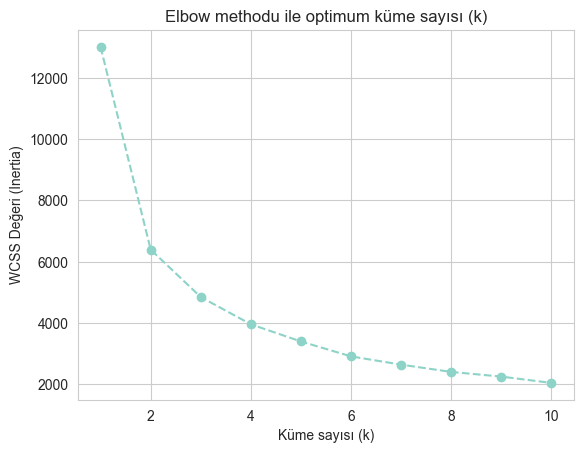

In [32]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 


# 1. WCSS değerlerini depolamak için boş liste oluşturma
wcss = []

# 2. 1'den 10'a kadar farklı k değerleri ile KMeans çalıştırma 
# not: Yüksek k değerleri için süre uzayabilir. 

for i in range(1,11):
    # n_init='auto' modern scikit-learn kullanımı için önerilir
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init='auto')
    kmeans.fit(rfm_scaled) #ölçeklenmiş veriyi kullanılıyoruz
    wcss.append(kmeans.inertia_) #inertia_ WCSS değerini verir

# 3. ELbow grafiğini çizme 
plt.Figure(figsize=(10,6))
plt.plot(range(1,11), wcss, marker='o', linestyle='--')
plt.title('Elbow methodu ile optimum küme sayısı (k)')
plt.xlabel('Küme sayısı (k)')
plt.ylabel('WCSS Değeri (Inertia)')
plt.grid(True)
plt.show()

Bu grafik, Küme Sayısı ($k$) arttıkça WCSS (Küme İçi Kareler Toplamı) değerinin nasıl azaldığını gösterir.
1. Hızlı Düşüş (1'den 3'e): Grafik, $k=1$'den $k=2$'ye ve $k=3$'e geçerken WCSS değerinin çok hızlı bir şekilde düştüğünü gösteriyor. Bu, ilk üç kümenin verinin varyansını açıklamakta büyük bir iş çıkardığı anlamına gelir.

2. Kırılma Noktası (Dirsek): Grafiğin eğiminin belirgin şekilde yavaşladığı, yani "dirsek" yaptığı nokta incelenmelidir.
* $k=3$'ten $k=4$'e veya $k=5$'e geçişte düşüş hala belirgin olsa da, $k=2$'den $k=3$'e geçişteki kadar dramatik değildir.
* En belirgin "Dirsek" (Optimum K): Genellikle $k=3$ veya $k=4$ noktaları arasında bir karar verilir. $k=3$ noktası, WCSS'nin artık yavaşlamaya başladığı ilk güçlü kırılma noktasıdır.
* $k=4$ ise daha net, iş açısından yorumlanabilir segmentler elde etmek için iyi bir ikinci adaydır.

K-Means Modellemesini Uygulama ve Segmentleri Belirleme
* Şimdi seçtiğimiz $k=4$ değerini kullanarak, verimizi gruplara ayıralım.

In [33]:
# 1. k=4 küme sayısını belirleme 
optimal_k = 4

# 2. Kmeans modelini kurma 
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')

# 3. Modeli Ölçeklenmiş veriye (rfm_scaled) uygulama ve her müşteriye bir küme atama 
rfm_scaled['Cluster'] = kmeans.fit_predict(rfm_scaled)

# 4. Küme etiketlerini orjinal RFM DataFramine (rfm_df) geri ekleme 
rfm_df['Cluster'] = rfm_scaled['Cluster']

# 5. her kümenin ortalama RFM değerlerini hesaplama (segmentleri yorumlamak için kratik)
# Orijinal (logaritma alınmamış) değerleri kullanmak, yorumlamayı kolaylaştırır.

segment_analysis = rfm_df.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().reset_index()

print("\n--- Segmentasyon Analizi (Küme Ortalama RFM Değerleri) ---")
print(segment_analysis.sort_values(by='Monetary', ascending=False))







--- Segmentasyon Analizi (Küme Ortalama RFM Değerleri) ---
   Cluster     Recency  Frequency     Monetary
1        1   10.326720  13.030423  7677.594656
3        3   70.882721   4.141517  1733.218767
0        0   21.597484   1.851572   467.620692
2        2  189.513926   1.267905   343.899928


## Tablo Yorumlama Ve Sonuç 
Yukarıdaki tablo, K-means algoritmasının RFM metriklerini kullanarak tüm müşterileri en iyi şekilde ayrıştırdığı 4 ana grubu(küme) temil ediyor. 

Tablonun amacı: Şirketin tüm müşterilerini rastgele bir şekilde değil, ortak davranış kalıplarına göre gruplamaktır. Bu tablo ile her gruba aynı reklam yapmak yerine, grubun özelliklerine göre özel bir strateji geliştirmek gerekir. 

Tablo Açıklaması: 
* Düşük Recency, müşterilerin hala aktif olduğunu gösterir. 
* Yüksek Frequency, müşterilerin sadık olduğunu gösterir. 
* Yüksek Monetary, müşterinin şirkete yüksek ciro getirdiğini gösterir. 

Tablo Yorumlaması: 
1. Küme 1: Şampiyonlar(En Değerli Segment)
Değerler sırası ile: 10,13,7677
Anlamı: Bu müşteriler çok sık alışveriş yapar, hem çok para harcar hem de bunu 10 gün önce yapmıştır. Onlar şirketin en sadık ve en karlı müşterileridir. 
Strateji: Ödüllendirme ve elde tutma. Asla kaybetmememiz gereken bir kitle. 

2. Küme 3: Potansiyel Sadıklar
Değerler sırası ile: 70,4.1,1733
Anlamı: İyi para harcamışlardır, makul sıklıkta gelmişlerdir ancak 2 aydır biraz uzaklaşmaya başlamışlardır. Onlar şampiyon olma potansiyeli taşıyan gruplardır. 
Strateji: Teşvik etme. Onlara özel indirimler, davetler sunarak frekanslarını arttırmaya ve Recency'lerini düşürmeye odaklanmak gerek. 

3. Küme 0: Yeni Müşteriler
Değerler sırası ile: 21,1.85,467
Anlamı: Müşteri yeni sayılır, ancak henüz sadık değil sadece 1-2 defa alışveriş yapmış. 
Strateji: Aktivasyon. Onlara marka sadakati kazandırcak kampanyalar, ürün tanıtımları yaparak Frequency değerlerini yükseltmeyi hedefleriz. 

4. Küme 2: Risk Altındakiler 
Değerler sırası ile: 189,1.2,343
Anlamı: Bu müşteriler 6 aydan fazla süredir alışveriş yapmamış ve toplamda çok az harcama yapmışlar. Kaybetme riski en yüksek olan gruptur. 
Strateji: Geri kazanım. Büyük indirimler, hediye çekleri gibi kampanyalar ile dikkat çekmek gerekir. Başarılı olunmazsa pazarlama maliyetini kesmek mantıklı olabilir. 